Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import random
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.datasets import make_classification, make_blobs, make_gaussian_quantiles
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from matplotlib import cm
from matplotlib.axis import Axis

Q1_Create 1000 points in 4 classes with 3 features

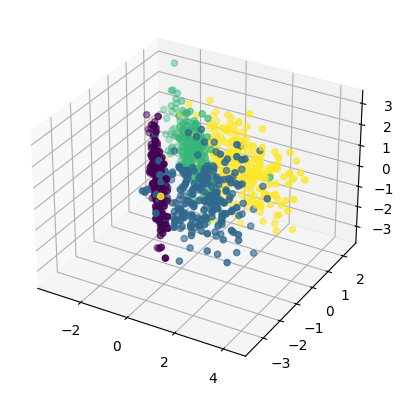

In [ ]:
X,y = make_classification(n_samples=1000, n_features=3, n_classes=4, n_redundant=0,
                          random_state=14, n_clusters_per_class=1, class_sep=1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

Q1_Split train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=14)

Q1_Training Logistic_Regression

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=50, random_state=14)
logistic_regression_model.fit(X=X_train, y=y_train)


LogisticRegression(max_iter=50, random_state=14)

Q1_Test Classification with Logistic_Regression

In [ ]:
y_hat = logistic_regression_model.predict(X_test)
y_hat_prob = logistic_regression_model.predict_proba(X_test)
accuracy = logistic_regression_model.score(X_test, y_test)
print('accuracy :', accuracy*100, '%')

accuracy : 89.0 %


Q1_Decision region for Logistic Regression(with wrong points)

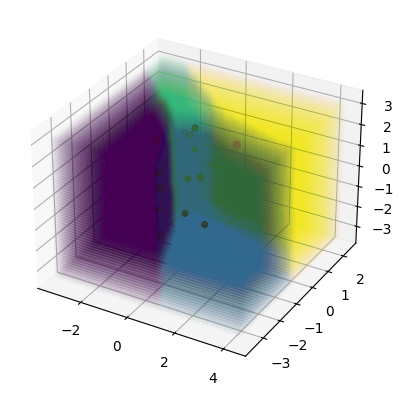

In [ ]:
x1_min, x2_min, x3_min = np.min(X, axis=0)
x1_max, x2_max, x3_max = np.max(X, axis=0)

n_of_points = 50
x1r = np.linspace(x1_min, x1_max, n_of_points)
x2r = np.linspace(x2_min, x2_max, n_of_points)
x3r = np.linspace(x3_min, x3_max, n_of_points)

x1m, x2m, x3m = np.meshgrid(x1r.flatten(), x2r.flatten(), x3r.flatten())

xm = np.stack((x1m.flatten(), x2m.flatten(), x3m.flatten()), axis=1)
ym = logistic_regression_model.decision_function(xm)
q = xm.shape
c = np.argmax(ym, axis=1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xm[:,0], xm[:,1], xm[:,2], c=c, alpha=0.01)

non_eq_idx = np.where(y_test!=y_hat)[0]
ax.scatter(X[non_eq_idx,0], X[non_eq_idx,1], X[non_eq_idx,2], color='red')


Q1_Decision region for Logistic Regression(without points)

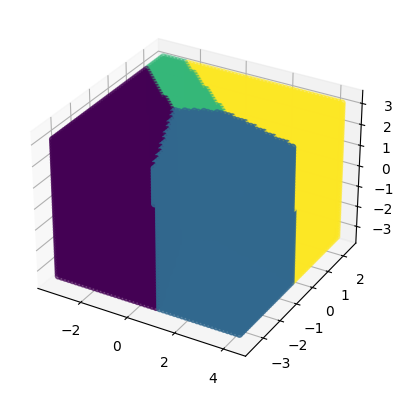

In [ ]:
x1_min, x2_min, x3_min = np.min(X, axis=0)
x1_max, x2_max, x3_max = np.max(X, axis=0)

n_of_points = 50
x1r = np.linspace(x1_min, x1_max, n_of_points)
x2r = np.linspace(x2_min, x2_max, n_of_points)
x3r = np.linspace(x3_min, x3_max, n_of_points)

x1m, x2m, x3m = np.meshgrid(x1r.flatten(), x2r.flatten(), x3r.flatten())

xm = np.stack((x1m.flatten(), x2m.flatten(), x3m.flatten()), axis=1)
ym = logistic_regression_model.decision_function(xm)
q = xm.shape
c = np.argmax(ym, axis=1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xm[:,0], xm[:,1], xm[:,2], c=c)

Q1_SGDClassifier train

In [ ]:
SGDClassifier_model = SGDClassifier(loss='log_loss', max_iter=50, random_state=14)
SGDClassifier_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=50, random_state=14)

Q1_SGDClassifier test

In [ ]:
y_hat = SGDClassifier_model.predict(X_test)
y_hat_prob = SGDClassifier_model.predict_proba(X_test)
accuracy = SGDClassifier_model.score(X_test, y_test)
print('accuracy :', accuracy*100, '%')

accuracy : 87.5 %


Q1_Decision region for SGD Classifier(without points)

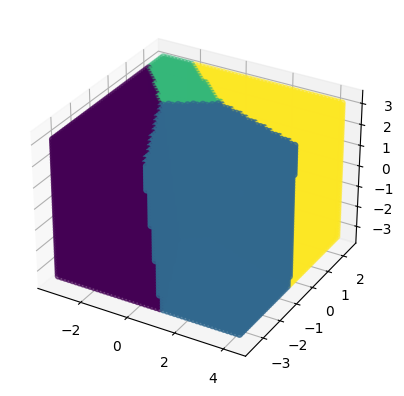

In [ ]:
x1_min, x2_min, x3_min = np.min(X, axis=0)
x1_max, x2_max, x3_max = np.max(X, axis=0)

n_of_points = 50

x1r = np.linspace(x1_min, x1_max, n_of_points)
x2r = np.linspace(x2_min, x2_max, n_of_points)
x3r = np.linspace(x3_min, x3_max, n_of_points)

x1m, x2m, x3m = np.meshgrid(x1r.flatten(), x2r.flatten(), x3r.flatten())

xm = np.stack((x1m.flatten(), x2m.flatten(), x3m.flatten()), axis=1)
ym = SGDClassifier_model.decision_function(xm)
q = xm.shape
c = np.argmax(ym, axis=1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xm[:,0], xm[:,1], xm[:,2], c=c)


Q1_Decision region for SGD Classifier(with points)

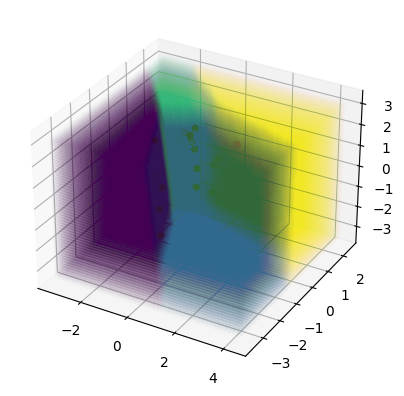

In [ ]:
x1_min, x2_min, x3_min = np.min(X, axis=0)
x1_max, x2_max, x3_max = np.max(X, axis=0)

n_of_points = 50

x1r = np.linspace(x1_min, x1_max, n_of_points)
x2r = np.linspace(x2_min, x2_max, n_of_points)
x3r = np.linspace(x3_min, x3_max, n_of_points)

x1m, x2m, x3m = np.meshgrid(x1r.flatten(), x2r.flatten(), x3r.flatten())

xm = np.stack((x1m.flatten(), x2m.flatten(), x3m.flatten()), axis=1)
ym = SGDClassifier_model.decision_function(xm)
q = xm.shape
c = np.argmax(ym, axis=1)
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xm[:,0], xm[:,1], xm[:,2], c=c, alpha=0.01)

non_eq_idx = np.where(y_test!=y_hat)[0]
ax.scatter(X[non_eq_idx,0], X[non_eq_idx,1], X[non_eq_idx,2], color='red')


Q1_Create data with drawdata

In [ ]:
!pip install drawdata
from drawdata import ScatterWidget
widget = ScatterWidget()
widget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.6/730.6 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

ScatterWidget()

Q1_Drawdata data praparing(Drawdata)

In [ ]:
data = widget.data_as_pandas
X = data[['x','y']].values
y = data[['label']].values.flatten()
mapping = {'a': 0, 'b': 1, 'c': 2, 'd': 3}
y = np.array([mapping[element] for element in y])
np.random.seed(14)
perm = np.random.permutation(len(y))
X = X[perm,:]
y = y[perm]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

KeyError: "None of [Index(['x', 'y'], dtype='object')] are in the [columns]"

Q1_Logistic Regression trainning(Drawdata)

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=300, random_state=14)
logistic_regression_model.fit(X=X_train, y=y_train)


Q1_Logistic regression test(Drawdata)

In [ ]:
y_hat = logistic_regression_model.predict(X_test)
y_hat_prob = logistic_regression_model.predict_proba(X_test)
accuracy = logistic_regression_model.score(X_test, y_test)
print('accuracy :', accuracy*100, '%')

Q1_Decision region for Logistic regression(Drawdata)

In [ ]:
x1_min, x2_min = np.min(X, axis=0)
x1_max, x2_max = np.max(X, axis=0)

n_of_points = 500
x1r = np.linspace(x1_min, x1_max, n_of_points)
x2r = np.linspace(x2_min, x2_max, n_of_points)

x1m, x2m = np.meshgrid(x1r, x2r)

xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = logistic_regression_model.decision_function(xm)

ym = np.argmax(ym, axis=1)


x1d = np.concatenate((xm[:,0], X_test[:,0]), axis=0)
x2d = np.concatenate((xm[:,1], X_test[:,1]), axis=0)
yd = np.concatenate((ym, y_test+4), axis=0)
plt.scatter(x1d, x2d, c=yd)
non_eq_idx = np.where(y_test!=y_hat)[0]

plt.scatter(X_test[non_eq_idx,0], X_test[non_eq_idx,1], color='red')

Q1_ SGDClassifier train(Drawdata)

In [ ]:
SGDClassifier_model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=14)
SGDClassifier_model.fit(X_train, y_train)

Q1_ SGDClassifier test(Drawdata)

In [ ]:
y_hat = SGDClassifier_model.predict(X_test)
y_hat_prob = SGDClassifier_model.predict_proba(X_test)
accuracy = SGDClassifier_model.score(X_test, y_test)
print('accuracy :', accuracy*100, '%')

Q1_ SGDClassifier decision region(Drawdata)

In [ ]:
x1_min, x2_min = np.min(X, axis=0)
x1_max, x2_max = np.max(X, axis=0)

n_of_points = 500
x1r = np.linspace(x1_min, x1_max, n_of_points)
x2r = np.linspace(x2_min, x2_max, n_of_points)

x1m, x2m = np.meshgrid(x1r, x2r)

xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = SGDClassifier_model.decision_function(xm)

ym = np.argmax(ym, axis=1)


x1d = np.concatenate((xm[:,0], X_test[:,0]), axis=0)
x2d = np.concatenate((xm[:,1], X_test[:,1]), axis=0)
yd = np.concatenate((ym, y_test+4), axis=0)
plt.scatter(x1d, x2d, c=yd)
non_eq_idx = np.where(y_test!=y_hat)[0]

plt.scatter(X_test[non_eq_idx,0], X_test[non_eq_idx,1], color='red')

Q2_Downloading CWRU Bearing dataset

In [ ]:
#!pip install --upgrade --no-cashe-dir gdown
#Fault data
!gdown 1KikXNbnJT75cTAps2r1kpPP7rsf1S4hX
bearing_fault_dataset = sio.loadmat('BearingData_fault.mat')
#Normal data
!gdown 1TkzbSJdtXipeYcwF6BoD9Ve4504UOq6W
bearing_normal_dataset = sio.loadmat('BearingData_Normal.mat')

Q2_Display dataset keys

In [ ]:
print(bearing_normal_dataset.keys())
print(bearing_fault_dataset.keys())

Q2_Reshape dataset

In [ ]:
M = 500
N = 200
x1_normal = np.reshape(bearing_normal_dataset['X099_DE_time'][0:M*N], (M,N))
x2_normal = np.reshape(bearing_normal_dataset['X099_FE_time'][0:M*N], (M,N))
x1_fault = np.reshape(bearing_fault_dataset['X108_DE_time'][0:M*N], (M,N))
x2_fault = np.reshape(bearing_fault_dataset['X108_FE_time'][0:M*N], (M,N))

Q2_Feature extraction function

In [ ]:
def feature_extract(x1,x2,ep):
  x1_n = np.expand_dims(x1, axis=2)
  x2_n = np.expand_dims(x2, axis=2)
  xc = np.concatenate((x1_n,x2_n), axis=2)
  xc_mean = np.mean(xc, axis=2)
  m = np.expand_dims(xc_mean, axis=2)
  m = np.concatenate((m,m), axis=2)

  feature = {'x1': x1,'x2': x2}
  feature['std']  = np.std(xc, axis=2)
  feature['p']    = np.amax(np.abs(xc), axis=2)
  temp = np.std(xc, axis=2)**3
  temp[temp == 0] = ep
  feature['ske']  = np.mean((xc-m)**3, axis=2) / temp
  temp = np.std(xc, axis=2)**4
  temp[temp == 0] = ep
  feature['kur']  = np.mean((xc-m)**4, axis=2) / temp
  feature['rms']  = np.sqrt(np.mean(xc**2, axis=2))
  temp = np.sqrt(np.mean(xc**2, axis=2))
  temp[temp == 0] = ep
  feature['cf']   = np.amax(np.abs(xc), axis=2) / temp
  feature['smr']  = np.mean(np.sqrt(np.abs(xc)), axis=2) ** 2
  temp = np.mean(np.sqrt(np.abs(xc)), axis=2) ** 2
  temp[temp == 0] = ep
  feature['clf']  = np.amax(np.abs(xc), axis=2) / temp
  temp = np.mean(np.abs(xc), axis=2)
  temp[temp == 0] = ep
  feature['sf']   = np.sqrt(np.mean(xc**2, axis=2)) / temp
  temp = np.mean(np.abs(xc), axis=2)
  temp[temp == 0] = ep
  feature['if1']  = np.amax(np.abs(xc), axis=2) / temp
  feature['if2']  = np.max(np.abs(xc), axis=2) / temp
  return feature


Q2_Feature extraction

In [ ]:
x_normal = feature_extract(x1_normal, x2_normal,1e-10)
x_fault = feature_extract(x1_fault, x2_fault,1e-10)

Q2_Normal and fault data concatenation

In [ ]:
X = {'x1': np.concatenate((x_normal['x1'], x_fault['x1']), axis=0),
     'x2': np.concatenate((x_normal['x2'], x_fault['x2']), axis=0),
     'std': np.concatenate((x_normal['std'], x_fault['std']), axis=0),
     'p': np.concatenate((x_normal['p'], x_fault['p']), axis=0),
     'ske': np.concatenate((x_normal['ske'], x_fault['ske']), axis=0),
     'kur': np.concatenate((x_normal['kur'], x_fault['kur']), axis=0),
     'rms': np.concatenate((x_normal['rms'], x_fault['rms']), axis=0),
     'cf': np.concatenate((x_normal['cf'], x_fault['cf']), axis=0),
     'smr': np.concatenate((x_normal['smr'], x_fault['smr']), axis=0),
     'clf': np.concatenate((x_normal['clf'], x_fault['clf']), axis=0),
     'sf': np.concatenate((x_normal['sf'], x_fault['sf']), axis=0),
     'if1': np.concatenate((x_normal['if1'], x_fault['if1']), axis=0),
     'if2': np.concatenate((x_normal['if2'], x_fault['if2']), axis=0)}
y0 = np.zeros((M,N))#normal
y1 = np.ones((M,N))#fault
y = np.concatenate((y0,y1), axis=0)


Q2_Shuffling annd train and test split

In [ ]:
data_shape = y.shape
for key,value in X.items():
  X[key] = X[key].flatten()
y = y.flatten()
np.random.seed(14)
perm = np.random.permutation(len(y))
for key,value in X.items():
  X[key] = X[key][perm]
y = y[perm]
for key,value in X.items():
  X[key] = X[key].reshape(data_shape)
y = y.reshape(data_shape)
#train and test split
train_size = 0.8
train_a = round(train_size*M*2)

X_train = {}
X_test = {}
for key, value in X.items():
  X_train[key] = X[key][0:train_a,:]
  X_test[key] = X[key][train_a:,:]
y_train = y[0:train_a,:]
y_test = y[train_a:,:]


Q2_Normalization

In [ ]:
for key,value in X.items():
  x_mean = np.mean(X_train[key])
  x_std = np.std(X_train[key])
  X_train[key] = (X_train[key]- x_mean)/x_std
  X_test[key] = (X_test[key]- x_mean)/x_std


Q2_Sigmoid

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

Q2_Logistic_Regression

In [ ]:
def logestic_regression(x,w):
  u = 0
  for key,value in x.items():
    u += x[key] * w[key]
  h_hat = sigmoid(u)
  return h_hat

$Loss=-[ylog(\hat{y})+(1-y)log(1-\hat{y})]$


In [ ]:
def bce(y, y_hat):
  ep = 1e-10
  loss = -(np.mean(y*np.log(y_hat + ep) + (1-y)*np.log(1-y_hat + ep)))
  return loss

$\nabla L_w(w)=\frac{1}{n}X^T(\hat{y}-y)$

In [ ]:
def gradient(x, y, y_hat):
  grd = {}
  for key, value in x.items():
    grd[key] = np.sum(np.multiply(x[key],(y_hat-y)))
  return grd

Gradient Descent

In [ ]:
def gradient_decent(w, eta, grads):
  for key, value in w.items():
    w[key] -= eta * grads[key]
  return w

Q2_Accuracy

In [ ]:
def accuracy(y, y_hat):
  acc = np.sum(y == np.round(y_hat)) / y.size
  return acc

Q2_Initial values

In [ ]:
X_train['bias'] = np.ones(X_train['x1'].shape)
X_test['bias'] = np.ones(X_test['x1'].shape)
np.random.seed(14)
w_initial = np.random.rand(len(X)+1,1)
w = {'bias': w_initial[0,0], 'x1': w_initial[1,0], 'x2': w_initial[2,0], 'std': w_initial[3,0], 'p': w_initial[4,0], 'ske': w_initial[5,0], 'kur': w_initial[6,0], 'rms': w_initial[7,0], 'cf': w_initial[8,0], 'smr': w_initial[9,0], 'clf': w_initial[10,0], 'sf': w_initial[11,0], 'if1': w_initial[12,0], 'if2': w_initial[13,0]}
initial_eta = 0.00001
eta = initial_eta
n_epochs = 100


Q2_train

In [ ]:
error_hist = []
for epoch in range(n_epochs):
    # predictions
    y_hat = logestic_regression(X_train, w)
    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(X_train, y_train, y_hat)

    # gradient descent
    w = gradient_decent(w, eta, grads)

    print(f'Epoch={epoch}, \t E={e}')

Q2_Plot error history

In [ ]:
plt.plot(error_hist)
plt.xlabel('epoch')
plt.ylabel('Loss')

Q2_Plot weights

In [ ]:
w_keys = list(w.keys())
w_values = list(w.values())
w_values = [abs(x) for x in w_values]
plt.bar(w_keys,w_values)

Q2_ Logistic regression accuracy and mse

In [ ]:
y_hat = logestic_regression(X_test, w)
print("accuracy: ",accuracy(y_test, y_hat)*100,'%')
mse = np.mean((y_hat-y_test)**2)
print("MSE: ", mse)

Q2_ Data preparing for Sklearn model

In [ ]:
x1_normal = bearing_normal_dataset['X099_DE_time'][0:10000,:]
x2_normal = bearing_normal_dataset['X099_FE_time'][0:10000,:]
x1_fault = bearing_fault_dataset['X108_DE_time'][0:10000,:]
x2_fault = bearing_fault_dataset['X108_FE_time'][0:10000,:]
x1 = np.concatenate([x1_normal, x1_fault], axis=0)
x2 = np.concatenate([x2_normal, x2_fault], axis=0)
y_normal = np.zeros(x1_normal.shape)
y_fault = np.ones(x1_fault.shape)
X = np.concatenate([x1, x2], axis=1)
y = np.concatenate([y_normal, y_fault], axis=0)

# Shuffling
X_shuffled, y_shuffled = shuffle(X, y, random_state=14)

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled,
                                                    test_size=0.2,
                                                    random_state=14)

Q2_Training Logistic_Regression(sklearn)

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=500, random_state=14)
logistic_regression_model.fit(X=X_train, y=y_train)


Q2_Test Classification with Logistic_Regression(sklearn)

In [ ]:
y_hat = logistic_regression_model.predict(X_test)
y_hat_prob = logistic_regression_model.predict_proba(X_test)
accuracy = logistic_regression_model.score(X_test, y_test)
print('accuracy :', accuracy*100, '%')

Q3_Dataset downloading

In [ ]:
!gdown 1gWTHhsD52p_0ZjqIE89UHsjfISBltKuC
weatherHistory = pd.read_csv('weatherHistory.csv')

Downloading...
From: https://drive.google.com/uc?id=1gWTHhsD52p_0ZjqIE89UHsjfISBltKuC
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 38.7MB/s]


Q3_Extract numeric data

In [ ]:
weatherHistory = weatherHistory.dropna()
numeric_weather_df = weatherHistory.select_dtypes(include=['number'])
print(weatherHistory.keys())
numeric_weather_df = numeric_weather_df.drop(columns=['Loud Cover'])

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


Q3_Draw heatmap

<Axes: >

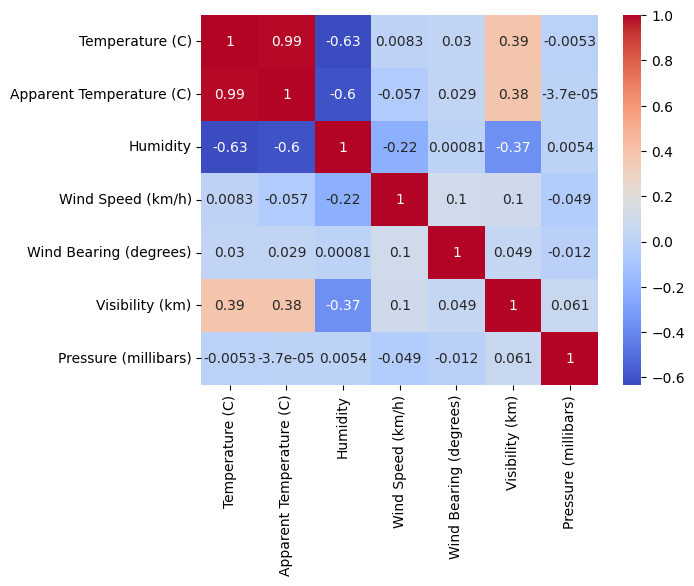

In [ ]:
correlation = numeric_weather_df.corr()
sns.heatmap(correlation, annot = True, cmap='coolwarm')

Q3_Draw histogram

array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >,
        <Axes: >]], dtype=object)

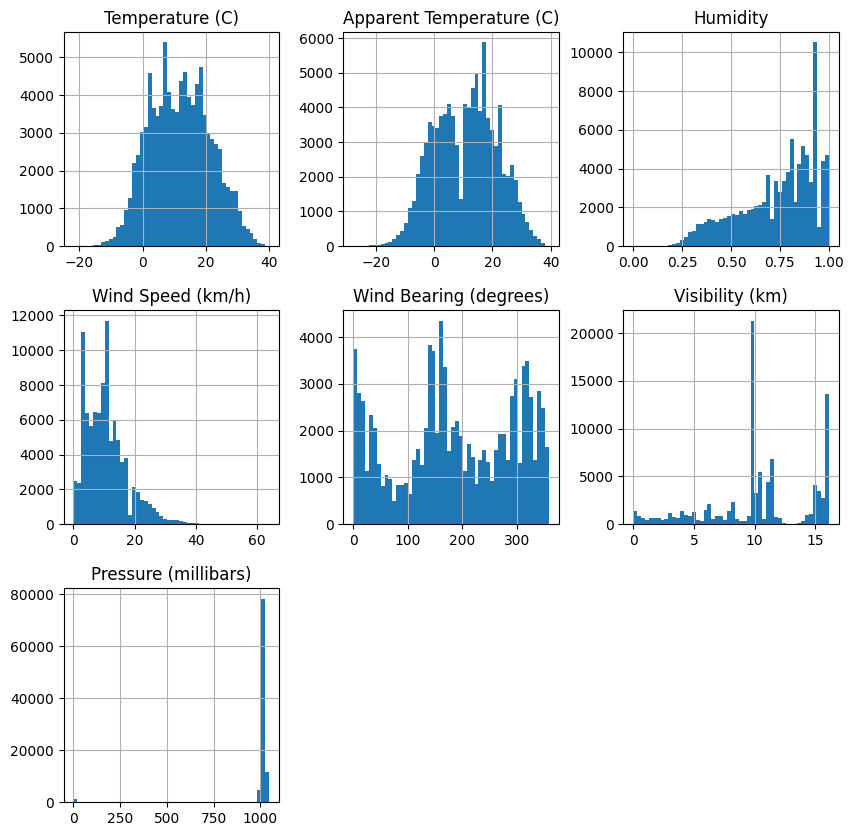

In [ ]:
numeric_weather_df.hist(bins=50, figsize=(10,10))
# plt.hist(numeric_weather_df, bins=5, edgecolor='black')

Q3_LS and RLS implement

In [ ]:
class LSRegression():
  def __init__(self):
    self.coefficient = None

  def fit(self, X, y):
    X = np.column_stack((np.ones((len(y), 1)), X))
    self.coefficient = np.linalg.inv(X.T@X)@X.T@y

  def predict(self, X):
    X = np.column_stack((np.ones((len(X), 1)), X))
    return X @ self.coefficient

  def mse(self, y, y_hat):
    return np.mean((y-y_hat)**2)

class RLSRegression():
  def __init__(self, n_features, forgetting_factor=0.9):
    self.n_features = n_features
    self.forgetting_factor = forgetting_factor
    self.theta = np.zeros((n_features,1))
    self.P = np.eye(n_features)

  def fit(self, X, y):
    errors = []

    for i in range(len(X)):
      x_i = X[i].reshape(-1,1)
      y_i = y[i]

      # Predict
      y_pred = (x_i.T) @ self.theta

      # Update
      error = y_i - y_pred
      errors.append(error)
      K = (self.P @ x_i) / (self.forgetting_factor + ((x_i.T) @ self.P @ x_i))
      self.theta = self.theta + (K@error)
      self.P = (1 / self.forgetting_factor) * (self.P - (K @ (x_i.T) @ self.P))

    return errors

  def predict(self, x):
      return x @ self.theta


Q3_LS test(Humidity and Temperature)

mse:  0.02299943159086298


Text(0, 0.5, 'Humidity')

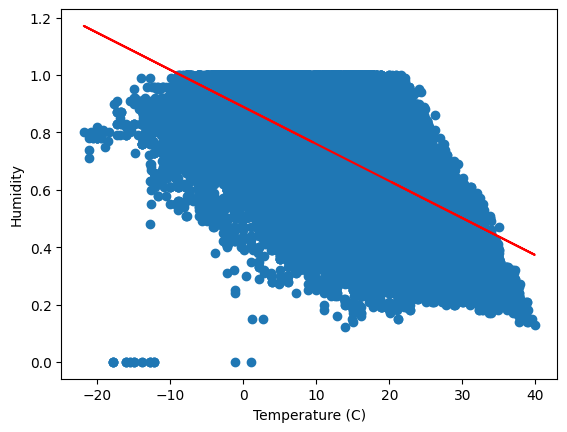

In [ ]:
X = numeric_weather_df['Temperature (C)'].values
y = numeric_weather_df['Humidity'].values
LSRegression_model = LSRegression()
LSRegression_model.fit(X, y)
y_hat = LSRegression_model.predict(X)
mse = LSRegression_model.mse(y, y_hat)
print('mse: ',mse)
plt.scatter(X, y)
plt.plot(X, y_hat, color='red')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

Q3_RLS test(Humidity and Temperature)

mse:  0.1469149388671844


Text(0, 0.5, 'Humidity')

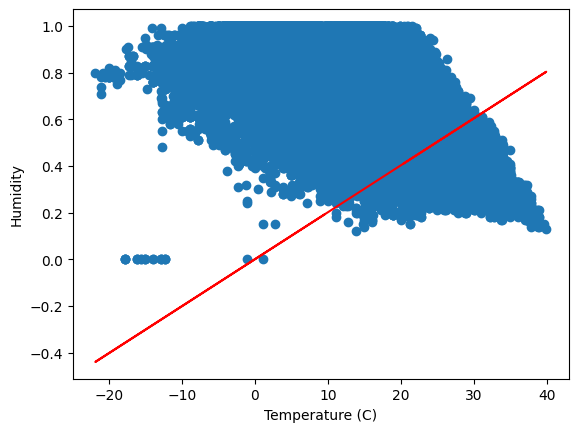

In [ ]:
X = numeric_weather_df['Temperature (C)'].values.reshape(-1,1)
y = numeric_weather_df['Humidity'].values
RLSRegression_model = RLSRegression(n_features=1, forgetting_factor=0.75)
e = RLSRegression_model.fit(X, y)
mse = np.mean((np.array(e)**2))
print('mse: ',mse)
y_hat = RLSRegression_model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_hat, color='red')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

Q3_LS test(Humidity and Apparent Temperature)

mse:  0.024406739117323467


Text(0, 0.5, 'Humidity')

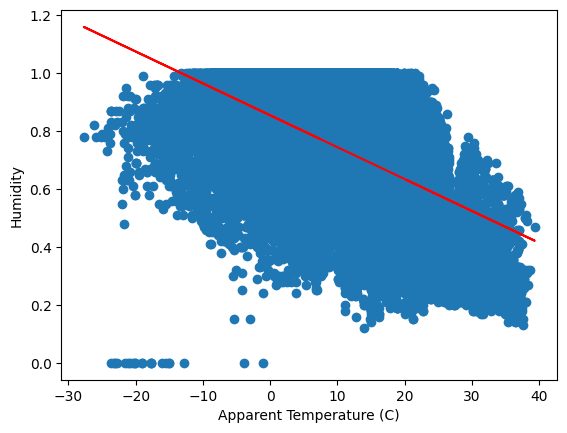

In [ ]:
X = numeric_weather_df['Apparent Temperature (C)'].values
y = numeric_weather_df['Humidity'].values
LSRegression_model = LSRegression()
LSRegression_model.fit(X, y)
y_hat = LSRegression_model.predict(X)
mse = LSRegression_model.mse(y, y_hat)
print('mse: ',mse)
plt.scatter(X, y)
plt.plot(X, y_hat, color='red')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')

Q3_RLS test(Humidity and Apparent Temperature)

mse:  0.15285242917228303


Text(0, 0.5, 'Humidity')

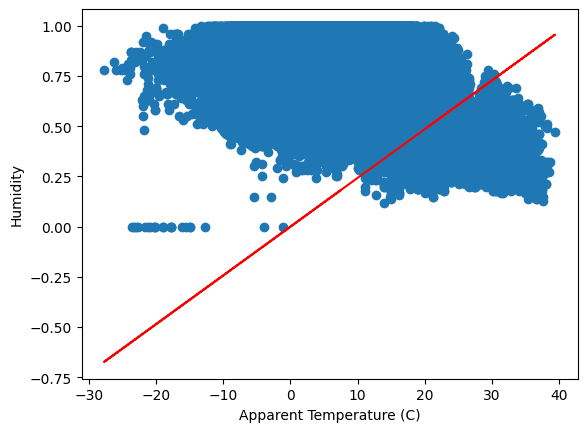

In [ ]:
X = numeric_weather_df['Apparent Temperature (C)'].values.reshape(-1,1)
y = numeric_weather_df['Humidity'].values
RLSRegression_model = RLSRegression(n_features=1, forgetting_factor=0.6)
e = RLSRegression_model.fit(X, y)
mse = np.mean((np.array(e)**2))
print('mse: ',mse)
y_hat = RLSRegression_model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_hat, color='red')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')

Q3_WLS implement

In [ ]:
class WLSRegression():
  def __init__(self):
    self.coefficient = None

  def fit(self, x, y, w):
    X = np.column_stack((np.ones((len(y),1)),x))
    X = X.T
    W = np.diag(np.concatenate((np.array([1]),w), axis=0))
    self.coefficient = np.linalg.inv(X.T@W@X)@X.T@W@y

  def predict(self, x):
    X = np.column_stack(np.ones(len(y),1),x)
    return X @ self.coefficient


In [ ]:
X = numeric_weather_df['Temperature (C)'].values
X = X[1:10000]
y = numeric_weather_df['Humidity'].values
y = y[1:10000]
WLSRegression_model = WLSRegression()
w = 1;
w=np.array([w])
WLSRegression_model.fit(X, y, w)
y_hat = WLSRegression_model.predict(X)
mse = WLSRegression_model.mse(y, y_hat)
print('mse: ',mse)
plt.scatter(X, y)
plt.plot(X, y_hat, color='red')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

LinAlgError: Singular matrix